In [1]:
# this model is purely based to select the best model for the housing price  prediction comp.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.impute import SimpleImputer
import xgboost as xgb
import lightgbm as lgb
print("setup complete")

setup complete


In [2]:
X_train_full=pd.read_csv(r'C:\Users\pilla\Downloads\train.csv',index_col='Id')
X_test_full=pd.read_csv(r'C:\Users\pilla\Downloads\test.csv',index_col='Id')
# i am directly removing some columns which are not useful (have much nan values) , since i have elaborated the steps
# in the previous related notebooks
X_train_full.drop(['PoolQC','Alley','MiscFeature','Fence'],axis=1,inplace=True)
X_test_full.drop(['PoolQC','Alley','MiscFeature','Fence'],axis=1,inplace=True)


In [3]:
X_train_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [4]:
X_train_full.columns[X_train_full.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [5]:
pd.unique(X_train_full['MSZoning'])

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [6]:
print(X_train_full['LotFrontage'])

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64


In [7]:
X_train_full['MSSubClass'].median()

50.0

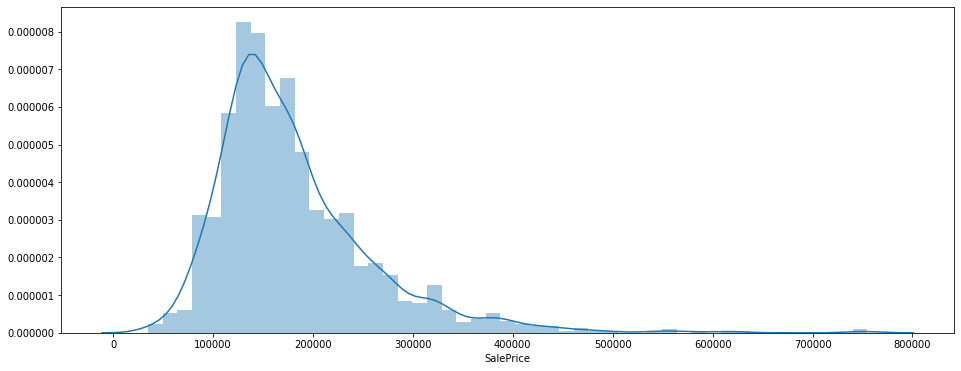

In [8]:
plt.figure(figsize=(16,6))
sns.distplot(X_train_full.SalePrice)

In [9]:
# We can see their are quite a few outliers in this data 
# this data is positively skewed meaning more points to the right.

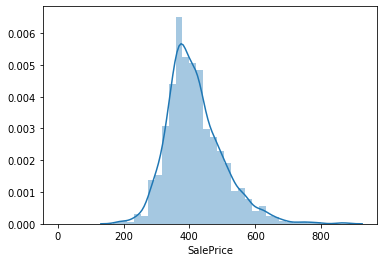

In [10]:
sns.distplot(np.sqrt(X_train_full['SalePrice']),hist_kws={'range':(0,800)})

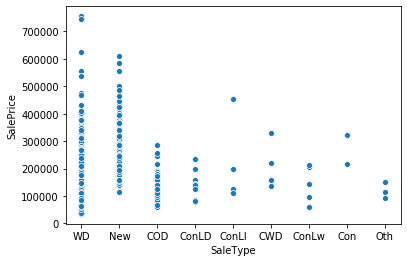

In [11]:
sns.scatterplot(X_train_full.SaleType,X_train_full.SalePrice)

In [12]:
num_cols=[col for col in X_train_full.columns if X_train_full[col].dtype in ['int64','float64']]
cat_cols=[col for col in X_train_full.columns if X_train_full[col].dtype =='object']

In [13]:
num_cols.remove('SalePrice')

In [14]:
print(set(X_train_full['MSZoning']))
print(set(X_test_full['MSZoning']))

{'RM', 'C (all)', 'RH', 'RL', 'FV'}
{nan, 'RM', 'C (all)', 'RH', 'RL', 'FV'}


In [15]:
from sklearn.model_selection import train_test_split
X=X_train_full[X_train_full.columns.drop('SalePrice')]
y=X_train_full.SalePrice
Xtrain,Xvalid,ytrain,yvalid=train_test_split(X,y,test_size=0.1,random_state=7)
Xtrain=Xtrain.copy()
Xvalid=Xvalid.copy()

In [16]:
nsi=SimpleImputer(strategy='median')
csi=SimpleImputer(strategy='most_frequent')
X_train_full[num_cols]=nsi.fit_transform(X_train_full[num_cols])
Xtrain[num_cols]=nsi.fit_transform(Xtrain[num_cols])
Xvalid[num_cols]=nsi.fit_transform(Xvalid[num_cols])
Xtrain[cat_cols]=csi.fit_transform(Xtrain[cat_cols])
Xvalid[cat_cols]=csi.fit_transform(Xvalid[cat_cols])
X_train_full[cat_cols]=csi.fit_transform(X_train_full[cat_cols])

X_test_full[num_cols]=nsi.fit_transform(X_test_full[num_cols])
X_test_full[cat_cols]=csi.fit_transform(X_test_full[cat_cols])

In [17]:
for col in cat_cols :
    print(col,set(X_test_full[col]).issubset(set(X_train_full[col])))

MSZoning True
Street True
LotShape True
LandContour True
Utilities True
LotConfig True
LandSlope True
Neighborhood True
Condition1 True
Condition2 True
BldgType True
HouseStyle True
RoofStyle True
RoofMatl True
Exterior1st True
Exterior2nd True
MasVnrType True
ExterQual True
ExterCond True
Foundation True
BsmtQual True
BsmtCond True
BsmtExposure True
BsmtFinType1 True
BsmtFinType2 True
Heating True
HeatingQC True
CentralAir True
Electrical True
KitchenQual True
Functional True
FireplaceQu True
GarageType True
GarageFinish True
GarageQual True
GarageCond True
PavedDrive True
SaleType True
SaleCondition True


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    X_train_full[col]=le.fit_transform(X_train_full[col])
    Xtrain.loc[:,col]=le.transform(Xtrain.loc[:,col])
    Xvalid.loc[:,col]=le.transform(Xvalid.loc[:,col])
    X_test_full[col]=le.transform(X_test_full[col])

In [19]:
X_train_full.isnull().sum()
X_train_full['LotFrontage']

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [20]:
dtrain=xgb.DMatrix(Xtrain,label=ytrain)
dvalid=xgb.DMatrix(Xvalid,label=yvalid)
param={'max_depth':6,'min_child_weight':8,'colsample_bytree':1,'subsample':1,'eta':0.1,'objective':'reg:squarederror',
       'eval_metric':'mae'}
num_round=1000
model=xgb.train(param,dtrain,num_boost_round=num_round,evals=[(dvalid,'valid')],early_stopping_rounds=10)

[0]	valid-mae:171008
Will train until valid-mae hasn't improved in 10 rounds.
[1]	valid-mae:153883
[2]	valid-mae:138889
[3]	valid-mae:125055
[4]	valid-mae:112748
[5]	valid-mae:101446
[6]	valid-mae:91442.3
[7]	valid-mae:82456.6
[8]	valid-mae:74335.9
[9]	valid-mae:67213.3
[10]	valid-mae:60749.7
[11]	valid-mae:54595.4
[12]	valid-mae:49306.2
[13]	valid-mae:44742.7
[14]	valid-mae:40528.8
[15]	valid-mae:36550.3
[16]	valid-mae:33192.7
[17]	valid-mae:30195.6
[18]	valid-mae:27633.7
[19]	valid-mae:25489.7
[20]	valid-mae:23515.9
[21]	valid-mae:21905.8
[22]	valid-mae:20570.5
[23]	valid-mae:19357
[24]	valid-mae:18459.8
[25]	valid-mae:17814.1
[26]	valid-mae:17231.3
[27]	valid-mae:16888.2
[28]	valid-mae:16492
[29]	valid-mae:16203.7
[30]	valid-mae:16100.2
[31]	valid-mae:15899.1
[32]	valid-mae:15849.6
[33]	valid-mae:15623.6
[34]	valid-mae:15595.5
[35]	valid-mae:15455.7
[36]	valid-mae:15469
[37]	valid-mae:15436.5
[38]	valid-mae:15349.8
[39]	valid-mae:15253.1
[40]	valid-mae:15257.2
[41]	valid-mae:15220.7

In [21]:
for col in cat_cols:
        print(col,set(X_test_full[col]).issubset(set(X_train_full[col])))
    

MSZoning True
Street True
LotShape True
LandContour True
Utilities True
LotConfig True
LandSlope True
Neighborhood True
Condition1 True
Condition2 True
BldgType True
HouseStyle True
RoofStyle True
RoofMatl True
Exterior1st True
Exterior2nd True
MasVnrType True
ExterQual True
ExterCond True
Foundation True
BsmtQual True
BsmtCond True
BsmtExposure True
BsmtFinType1 True
BsmtFinType2 True
Heating True
HeatingQC True
CentralAir True
Electrical True
KitchenQual True
Functional True
FireplaceQu True
GarageType True
GarageFinish True
GarageQual True
GarageCond True
PavedDrive True
SaleType True
SaleCondition True


In [22]:
min_mae=np.inf
best_params= None
gsp=[(maxdepth,minchild)
     for maxdepth in range(4,14)
     for minchild in range(4,14)]
for maxdepth,minchild in gsp :
    print(f'cv with maxdepth:{maxdepth} and minchildweight:{minchild}')
    param['max_depth']=maxdepth
    param['min_child_weight']=minchild
    cv_results=xgb.cv(param,dtrain,num_boost_round=num_round,seed=42,nfold=5
                      ,metrics={'mae'},early_stopping_rounds=10)
    mean_mae=cv_results['test-mae-mean'].min()
    boost_rounds=cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if min_mae>mean_mae:
        best_params=(param['max_depth'],param['min_child_weight']) # we can also write maxdepth or minchild directly
        min_mae=mean_mae
print("the best param is max_depth={}, and min child weight is {} ".format(best_params[0],best_params[1]))
        
    
    

cv with maxdepth:4 and minchildweight:4
	MAE 16409.745117399998 for 138 rounds
cv with maxdepth:4 and minchildweight:5
	MAE 16237.6125 for 193 rounds
cv with maxdepth:4 and minchildweight:6
	MAE 16364.5853516 for 142 rounds
cv with maxdepth:4 and minchildweight:7
	MAE 16186.631835799999 for 244 rounds
cv with maxdepth:4 and minchildweight:8
	MAE 16651.964258 for 147 rounds
cv with maxdepth:4 and minchildweight:9
	MAE 16264.2519532 for 237 rounds
cv with maxdepth:4 and minchildweight:10
	MAE 16709.0541016 for 182 rounds
cv with maxdepth:4 and minchildweight:11
	MAE 16744.1517578 for 130 rounds
cv with maxdepth:4 and minchildweight:12
	MAE 16431.2441406 for 236 rounds
cv with maxdepth:4 and minchildweight:13
	MAE 16678.2523438 for 141 rounds
cv with maxdepth:5 and minchildweight:4
	MAE 16267.517187200001 for 163 rounds
cv with maxdepth:5 and minchildweight:5
	MAE 16416.8613282 for 208 rounds
cv with maxdepth:5 and minchildweight:6
	MAE 16552.3748046 for 135 rounds
cv with maxdepth:5 and 

In [23]:
param['max_depth']=7
param['min_child_weight']=9


In [24]:
gsp=[(subsample,colsample)
    for subsample in [i/10 for i in range(1,11)]
    for colsample in [i/10 for i in range (1,11)] ]
min_mae=np.inf
best_params=None
for subsample, colsample in gsp:
    print(f'cv with subsample:{subsample}, and colsamplebytree:{colsample}')
    param['subsample']=subsample
    param['colsample_bytree']=colsample
    cv_results=xgb.cv(param,dtrain,num_boost_round=num_round,nfold=5,seed=42,metrics={'mae'},early_stopping_rounds=10)
    mean_mae=cv_results['test-mae-mean'].min()
    boost_rounds=cv_results['test-mae-mean'].argmin()
    print(f'MAE : {mean_mae} , for {boost_rounds} boost rounds')
    if min_mae>mean_mae:
        min_mae=mean_mae
        best_params=(subsample,colsample)
print('The best params are subsample : {} and colsample bytree : {}'.format(*best_params))
     

cv with subsample:0.1, and colsamplebytree:0.1
MAE : 19611.7191408 , for 74 boost rounds
cv with subsample:0.1, and colsamplebytree:0.2
MAE : 19055.2078126 , for 76 boost rounds
cv with subsample:0.1, and colsamplebytree:0.3
MAE : 18788.3878908 , for 68 boost rounds
cv with subsample:0.1, and colsamplebytree:0.4
MAE : 18548.8546874 , for 69 boost rounds
cv with subsample:0.1, and colsamplebytree:0.5
MAE : 18156.3396484 , for 112 boost rounds
cv with subsample:0.1, and colsamplebytree:0.6
MAE : 18194.8246094 , for 75 boost rounds
cv with subsample:0.1, and colsamplebytree:0.7
MAE : 18087.7505858 , for 88 boost rounds
cv with subsample:0.1, and colsamplebytree:0.8
MAE : 18555.1582032 , for 77 boost rounds
cv with subsample:0.1, and colsamplebytree:0.9
MAE : 18383.525 , for 66 boost rounds
cv with subsample:0.1, and colsamplebytree:1.0
MAE : 18002.2669922 , for 78 boost rounds
cv with subsample:0.2, and colsamplebytree:0.1
MAE : 18244.748047 , for 87 boost rounds
cv with subsample:0.2, an

MAE : 16432.6478516 , for 73 boost rounds
cv with subsample:1.0, and colsamplebytree:0.3
MAE : 16182.1429688 , for 104 boost rounds
cv with subsample:1.0, and colsamplebytree:0.4
MAE : 15990.2476564 , for 144 boost rounds
cv with subsample:1.0, and colsamplebytree:0.5
MAE : 16337.5841798 , for 156 boost rounds
cv with subsample:1.0, and colsamplebytree:0.6
MAE : 16258.366210799999 , for 153 boost rounds
cv with subsample:1.0, and colsamplebytree:0.7
MAE : 16383.6283202 , for 97 boost rounds
cv with subsample:1.0, and colsamplebytree:0.8
MAE : 16552.5095704 , for 91 boost rounds
cv with subsample:1.0, and colsamplebytree:0.9
MAE : 16684.8652344 , for 64 boost rounds
cv with subsample:1.0, and colsamplebytree:1.0
MAE : 16131.131640800002 , for 149 boost rounds
The best params are subsample : 1.0 and colsample bytree : 0.4


In [26]:
param['subsample']=1.0
param['colsample_bytree']=0.4


In [27]:
# now tuning eta
%time
min_mae=np.inf
best_params=None
for eta in [.4,.3,.2,.1,.05,.01,.005]:
    print(f"cv for eta : {eta}")
    param['eta']=eta
    cv_results=xgb.cv(param,dtrain,num_boost_round=num_round,nfold=5,seed=42,metrics='mae',early_stopping_rounds=10)
    mean_mae=cv_results['test-mae-mean'].min()
    boost_rounds=cv_results['test-mae-mean'].argmin()
    print(f"MAE : {mean_mae} for {boost_rounds} boosting rounds")
    if mean_mae<min_mae:
        min_mae=mean_mae
        best_params=eta
print(f"The best param is eta:{best_params}")

Wall time: 0 ns
cv for eta : 0.4
MAE : 19003.4058594 for 42 boosting rounds
cv for eta : 0.3
MAE : 18382.066797 for 31 boosting rounds
cv for eta : 0.2
MAE : 16924.9667968 for 71 boosting rounds
cv for eta : 0.1
MAE : 15990.248047000001 for 144 boosting rounds
cv for eta : 0.05
MAE : 16159.9376954 for 152 boosting rounds
cv for eta : 0.01
MAE : 15712.947070400001 for 721 boosting rounds
cv for eta : 0.005
MAE : 15813.8552732 for 999 boosting rounds
The best param is eta:0.01


In [29]:
param['eta']=0.01
print(param)

{'max_depth': 7, 'min_child_weight': 9, 'colsample_bytree': 0.4, 'subsample': 1.0, 'eta': 0.01, 'objective': 'reg:squarederror', 'eval_metric': 'mae'}


In [32]:
model=xgb.train(param,dtrain,num_boost_round=num_round,evals=[(dvalid,'validset')],early_stopping_rounds=10)
print(f"The best score obtained is = {model.best_score} ",f'and the best iteration is = {model.best_iteration+1}',sep='\n')


[0]	validset-mae:188096
Will train until validset-mae hasn't improved in 10 rounds.
[1]	validset-mae:186255
[2]	validset-mae:184454
[3]	validset-mae:182635
[4]	validset-mae:180905
[5]	validset-mae:179093
[6]	validset-mae:177312
[7]	validset-mae:175595
[8]	validset-mae:173892
[9]	validset-mae:172161
[10]	validset-mae:170460
[11]	validset-mae:168758
[12]	validset-mae:167081
[13]	validset-mae:165385
[14]	validset-mae:163727
[15]	validset-mae:162131
[16]	validset-mae:160536
[17]	validset-mae:158963
[18]	validset-mae:157391
[19]	validset-mae:155805
[20]	validset-mae:154233
[21]	validset-mae:152741
[22]	validset-mae:151217
[23]	validset-mae:149707
[24]	validset-mae:148226
[25]	validset-mae:146745
[26]	validset-mae:145282
[27]	validset-mae:143846
[28]	validset-mae:142455
[29]	validset-mae:141004
[30]	validset-mae:139594
[31]	validset-mae:138232
[32]	validset-mae:136848
[33]	validset-mae:135455
[34]	validset-mae:134132
[35]	validset-mae:132783
[36]	validset-mae:131439
[37]	validset-mae:130137


[310]	validset-mae:15700.3
[311]	validset-mae:15658.8
[312]	validset-mae:15622.1
[313]	validset-mae:15577.6
[314]	validset-mae:15543.8
[315]	validset-mae:15517
[316]	validset-mae:15487.6
[317]	validset-mae:15456.7
[318]	validset-mae:15433.4
[319]	validset-mae:15408.2
[320]	validset-mae:15384.4
[321]	validset-mae:15338.8
[322]	validset-mae:15309.1
[323]	validset-mae:15284.6
[324]	validset-mae:15251.5
[325]	validset-mae:15215.3
[326]	validset-mae:15183.4
[327]	validset-mae:15144.2
[328]	validset-mae:15117.5
[329]	validset-mae:15092.6
[330]	validset-mae:15068.5
[331]	validset-mae:15041.4
[332]	validset-mae:15012.1
[333]	validset-mae:14984.5
[334]	validset-mae:14961.7
[335]	validset-mae:14947.8
[336]	validset-mae:14920.3
[337]	validset-mae:14893.9
[338]	validset-mae:14870.1
[339]	validset-mae:14846.8
[340]	validset-mae:14829.9
[341]	validset-mae:14808.4
[342]	validset-mae:14796.1
[343]	validset-mae:14773.5
[344]	validset-mae:14763.4
[345]	validset-mae:14743.4
[346]	validset-mae:14733.7
[34

In [35]:
num_round=model.best_iteration + 1
print(num_round)
# since we have the exact number of boosting rounds we do not need early_stopping_rounds

497


In [36]:
best_model=xgb.train(param,dtrain,num_boost_round=num_round,evals=[(dvalid,'validset')])

[0]	validset-mae:188096
[1]	validset-mae:186255
[2]	validset-mae:184454
[3]	validset-mae:182635
[4]	validset-mae:180905
[5]	validset-mae:179093
[6]	validset-mae:177312
[7]	validset-mae:175595
[8]	validset-mae:173892
[9]	validset-mae:172161
[10]	validset-mae:170460
[11]	validset-mae:168758
[12]	validset-mae:167081
[13]	validset-mae:165385
[14]	validset-mae:163727
[15]	validset-mae:162131
[16]	validset-mae:160536
[17]	validset-mae:158963
[18]	validset-mae:157391
[19]	validset-mae:155805
[20]	validset-mae:154233
[21]	validset-mae:152741
[22]	validset-mae:151217
[23]	validset-mae:149707
[24]	validset-mae:148226
[25]	validset-mae:146745
[26]	validset-mae:145282
[27]	validset-mae:143846
[28]	validset-mae:142455
[29]	validset-mae:141004
[30]	validset-mae:139594
[31]	validset-mae:138232
[32]	validset-mae:136848
[33]	validset-mae:135455
[34]	validset-mae:134132
[35]	validset-mae:132783
[36]	validset-mae:131439
[37]	validset-mae:130137
[38]	validset-mae:128818
[39]	validset-mae:127520
[40]	valid

[312]	validset-mae:15622.1
[313]	validset-mae:15577.6
[314]	validset-mae:15543.8
[315]	validset-mae:15517
[316]	validset-mae:15487.6
[317]	validset-mae:15456.7
[318]	validset-mae:15433.4
[319]	validset-mae:15408.2
[320]	validset-mae:15384.4
[321]	validset-mae:15338.8
[322]	validset-mae:15309.1
[323]	validset-mae:15284.6
[324]	validset-mae:15251.5
[325]	validset-mae:15215.3
[326]	validset-mae:15183.4
[327]	validset-mae:15144.2
[328]	validset-mae:15117.5
[329]	validset-mae:15092.6
[330]	validset-mae:15068.5
[331]	validset-mae:15041.4
[332]	validset-mae:15012.1
[333]	validset-mae:14984.5
[334]	validset-mae:14961.7
[335]	validset-mae:14947.8
[336]	validset-mae:14920.3
[337]	validset-mae:14893.9
[338]	validset-mae:14870.1
[339]	validset-mae:14846.8
[340]	validset-mae:14829.9
[341]	validset-mae:14808.4
[342]	validset-mae:14796.1
[343]	validset-mae:14773.5
[344]	validset-mae:14763.4
[345]	validset-mae:14743.4
[346]	validset-mae:14733.7
[347]	validset-mae:14715.8
[348]	validset-mae:14708.9
[34

In [40]:
dtest=xgb.DMatrix(X_test_full)
pred=model.predict(dtest)
output=pd.DataFrame({'Id':X_test_full.index,'SalePrice':pred})
output.to_csv('sub3',index=False)
output.shape

(1459, 2)

In [43]:
best_model.save_model('my_model.model')